In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#CLEAN THE AIRBNB DATA
AirBnB_df = pd.read_csv('Resources/AB_US_2020.csv')

#Add date column that states month-year to match city sales df headers
last_review = AirBnB_df.loc[:,'last_review']
AirBnB_df['last_review'] = AirBnB_df['last_review'].fillna('00/00/00')

new_dates_list = []
for date in last_review:
    if int(date[:2]) > 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[1]}'
        new_dates_list.append(new_date)
        
    elif int(date[:2]) <= 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[0]}'
        new_dates_list.append(new_date)

AirBnB_df['Month/Year'] = new_dates_list


#Change New York City to New York
AirBnB_df = AirBnB_df.replace("New York City","New York")

#Change NaN for review_per_month to 0
AirBnB_df['reviews_per_month'] = AirBnB_df['reviews_per_month'].fillna(0)


# SALES CITY DATA
#Pull in Sales City data
sales_city_df = pd.read_csv('Resources/House_Sales_City.csv')

#Group Sales City Data and check duplicate cities (will have counts > 1)
grouped_df = sales_city_df.groupby('RegionName').count()

#Pull rows where values = 1 to get non-duplicate cities
sales_city_list = grouped_df[grouped_df['RegionID']==1].index

#Unique cities in the AirBnB data
thelist = AirBnB_df['city'].unique()

#Pull sales city data from cities in AirBnB data
clean_city_df = sales_city_df[sales_city_df['RegionName'].isin(sales_city_list)]
clean_city_df = clean_city_df[clean_city_df['RegionName'].isin(thelist)]

#Merge both data sets
merged_data = AirBnB_df.merge(clean_city_df, right_on = 'RegionName', left_on = 'city')

C:\Users\whois\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# got a list of every column using = [print(f'"{item}",') for item in merged_data.columns]/ got every column for a date
cols_i_want = ["2008-03","2008-04",
"2008-05",
"2008-06",
"2008-07",
"2008-08",
"2008-09",
"2008-10",
"2008-11",
"2008-12",
"2009-01",
"2009-02",
"2009-03",
"2009-04",
"2009-05",
"2009-06",
"2009-07",
"2009-08",
"2009-09",
"2009-10",
"2009-11",
"2009-12",
"2010-01",
"2010-02",
"2010-03",
"2010-04",
"2010-05",
"2010-06",
"2010-07",
"2010-08",
"2010-09",
"2010-10",
"2010-11",
"2010-12",
"2011-01",
"2011-02",
"2011-03",
"2011-04",
"2011-05",
"2011-06",
"2011-07",
"2011-08",
"2011-09",
"2011-10",
"2011-11",
"2011-12",
"2012-01",
"2012-02",
"2012-03",
"2012-04",
"2012-05",
"2012-06",
"2012-07",
"2012-08",
"2012-09",
"2012-10",
"2012-11",
"2012-12",
"2013-01",
"2013-02",
"2013-03",
"2013-04",
"2013-05",
"2013-06",
"2013-07",
"2013-08",
"2013-09",
"2013-10",
"2013-11",
"2013-12",
"2014-01",
"2014-02",
"2014-03",
"2014-04",
"2014-05",
"2014-06",
"2014-07",
"2014-08",
"2014-09",
"2014-10",
"2014-11",
"2014-12",
"2015-01",
"2015-02",
"2015-03",
"2015-04",
"2015-05",
"2015-06",
"2015-07",
"2015-08",
"2015-09",
"2015-10",
"2015-11",
"2015-12",
"2016-01",
"2016-02",
"2016-03",
"2016-04",
"2016-05",
"2016-06",
"2016-07",
"2016-08",
"2016-09",
"2016-10",
"2016-11",
"2016-12",
"2017-01",
"2017-02",
"2017-03",
"2017-04",
"2017-05",
"2017-06",
"2017-07",
"2017-08",
"2017-09",
"2017-10",
"2017-11",
"2017-12",
"2018-01",
"2018-02",
"2018-03",
"2018-04",
"2018-05",
"2018-06",
"2018-07",
"2018-08",
"2018-09",
"2018-10",
"2018-11",
"2018-12",
"2019-01",
"2019-02",
"2019-03",
"2019-04",
"2019-05",
"2019-06",
"2019-07",
"2019-08",
"2019-09",
"2019-10",
"2019-11",
"2019-12",
"2020-01",
"2020-02",
"2020-03"]

In [65]:
# break the type using bins into either privatley or company owned less than five is owned privatley
bins = [0,5,600]
type = ["Privatley Owned","Owned by a Company"]
merged_data["Type Property"] = pd.cut(merged_data["calculated_host_listings_count"], bins, labels=type)
#group the data by type
grouptype = merged_data.groupby("Type Property")
avgsale = grouptype[cols_i_want].mean()
avgsale
#made how many rows I am going to use smaller so it would properly fit on the graph
newavgsale=avgsale[avgsale.columns[119:144]]

In [14]:
# get the how long the list is of x values
x_value =list(newavgsale.columns.values)
lengthprices=len(x_value)

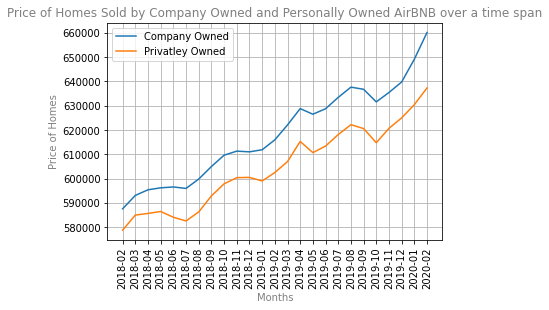

In [15]:
#getting the list values for my plotting
comowned=newavgsale.iloc[1,:]
privowned=newavgsale.iloc[0,:]
#plotting the graph
plt.xlabel("Months", color= "grey")
plt.title("Price of Homes Sold by Company Owned and Personally Owned AirBNB over a time span",color="grey")
plt.ylabel("Price of Homes", color= "grey")
plt.plot(comowned, label="Company Owned")
plt.plot(privowned, label= "Privatley Owned")
plt.xticks(range(0,lengthprices), rotation =90)
plt.grid()
plt.legend()
plt.show()

<AxesSubplot:xlabel='city,Type Property'>

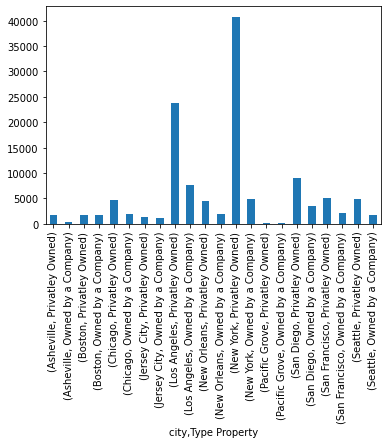

In [57]:
citygroup =merged_data.groupby(["city", "Type Property"])
countcitytype = citygroup.count()
count_city_type= countcitytype["id"]
count_city_type.plot.bar()


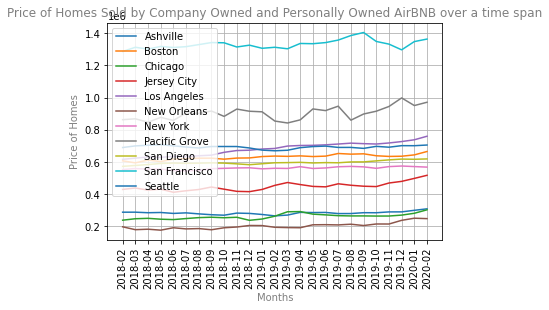

In [79]:
#grouped by city
pricecitygroup = merged_data.groupby("city")
#avg of prices in city
pricegrpcity=pricecitygroup[cols_i_want].mean()
pricegrpcity
newpricegrpcity = pricegrpcity[pricegrpcity.columns[119:144]]
newpricegrpcity
#each city list for the months
ashville = newpricegrpcity.iloc[0,:]
boston = newpricegrpcity.iloc[1,:]
chicago = newpricegrpcity.iloc[2,:]
jersey_city = newpricegrpcity.iloc[3,:]
los_angeles = newpricegrpcity.iloc[4,:]
new_orleans = newpricegrpcity.iloc[5,:]
new_york = newpricegrpcity.iloc[6,:]
pacific_grove = newpricegrpcity.iloc[7,:]
san_diego = newpricegrpcity.iloc[8,:]
san_francisco = newpricegrpcity.iloc[9,:]
seattle = newpricegrpcity.iloc[10,:]

plt.xlabel("Months", color= "grey")
plt.title("Price of Homes Sold by Company Owned and Personally Owned AirBNB over a time span",color="grey")
plt.ylabel("Price of Homes by Millions", color= "grey")
plt.plot(ashville, label="Ashville")
plt.plot(boston, label="Boston")
plt.plot(chicago, label="Chicago")
plt.plot(jersey_city, label="Jersey City")
plt.plot(los_angeles, label="Los Angeles")
plt.plot(new_orleans, label="New Orleans")
plt.plot(new_york, label="New York")
plt.plot(pacific_grove, label="Pacific Grove")
plt.plot(san_diego, label="San Diego")
plt.plot(san_francisco, label="San Francisco")
plt.plot(seattle, label="Seattle")
plt.xticks(range(0,lengthprices), rotation =90)
plt.grid()
plt.legend(loc = "upper left")
plt.show()
#avgsale = grouptype[cols_i_want].mean()
#newpricegrpcity
#,(boston, label="Boston"))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,Type Property
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,...,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0,Privatley Owned
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,...,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0,Owned by a Company
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,...,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0,Privatley Owned
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,...,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0,Privatley Owned
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,...,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0,310900.0,Privatley Owned


In [80]:
san_francisco

2018-02    1287100.0
2018-03    1313200.0
2018-04    1302000.0
2018-05    1318400.0
2018-06    1311800.0
2018-07    1317100.0
2018-08    1329700.0
2018-09    1342500.0
2018-10    1341100.0
2018-11    1315000.0
2018-12    1326300.0
2019-01    1306900.0
2019-02    1313200.0
2019-03    1303900.0
2019-04    1336900.0
2019-05    1335400.0
2019-06    1342300.0
2019-07    1358000.0
2019-08    1386200.0
2019-09    1405100.0
2019-10    1349400.0
2019-11    1332900.0
2019-12    1297300.0
2020-01    1348600.0
2020-02    1364300.0
Name: San Francisco, dtype: float64